In [47]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, low_memory=False)
ride_data = pd.read_csv(ride_data_to_load, low_memory=False)

# Combine the data into a single dataset
combined_set = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
combined_set.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

C:\Users\sandi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sandi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
No handles with labels found to put in legend.


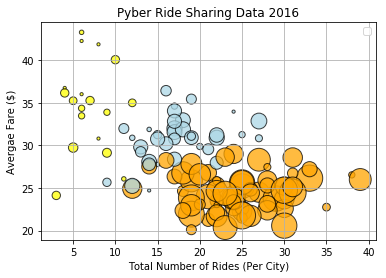

In [260]:
# Obtain the x and y coordinates for each of the three city types
city_type_group= combined_set.groupby('city')

city_types = pd.DataFrame(city_type_group['type'].value_counts())
city_types.drop(columns='type',inplace=True)
city_types.reset_index(inplace=True)

# Build the scatter plots for each city types
rides_per_city = ride_data['city'].value_counts()
rides_per_citydf = pd.DataFrame(rides_per_city)
rides_per_citydf.reset_index(inplace=True)
rides_per_citydf.rename(columns={'city': 'Ride Count', 'index':'city'}, inplace=True)
rides_per_citydf.sort_values(by='city',ascending=True, inplace=True)

rides_sums_merge = pd.merge(rides_sums, rides_per_citydf, on='city')

rides_sums_merge['driver_count'] = rides_sums_merge['driver_count']/rides_sums_merge['Ride Count']
rides_sums_merge['Average Fare'] = rides_sums_merge['fare']/rides_sums_merge['Ride Count']

types_merge = pd.merge(rides_sums_merge, city_types, on='city')

types_merge.drop(columns={'ride_id'}, inplace=True)
types_merge['driver_count'] = types_merge['driver_count'].astype('int')
types_merge['color']='yellow'
types_merge['color'][types_merge['type'] == 'Urban'] = 'orange'
types_merge['color'][types_merge['type'] == 'Suburban'] = 'lightblue'

ax1 = types_merge.plot.scatter(edgecolors="black",x='Ride Count', y='Average Fare',
                               s=types_merge['driver_count']*10, c=types_merge['color'],alpha=.75)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Avergae Fare ($)')
plt.title('Pyber Ride Sharing Data 2016')
plt.grid()
plt.legend(loc='best')

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("images/scatter.png")

## Total Fares by City Type

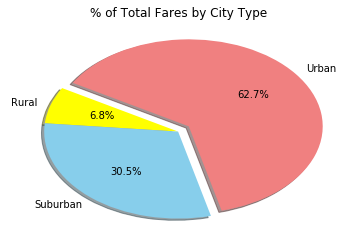

<Figure size 432x288 with 0 Axes>

In [290]:
# Calculate Type Percents
types_group =types_merge.groupby('type')

types_group.head()
typesgroup_df= types_group.sum()

total= typesgroup_df['fare'].sum()
typesgroup_df['Fares Percentage']=typesgroup_df['fare']/total*100

typesgroup_df.reset_index(inplace=True)

# Build Pie Chart
labels = typesgroup_df['type']
sizes = typesgroup_df['Fares Percentage']
colors = ["yellow", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("images/percent_fares.png", dpi=72)

plt.show()
plt.draw()



## Total Rides by City Type

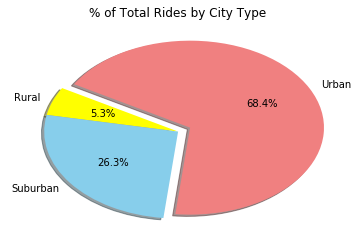

<Figure size 432x288 with 0 Axes>

In [291]:
# Calculate Ride Percents
total_rides= typesgroup_df['Ride Count'].sum()
typesgroup_df['Rides Percentage']=typesgroup_df['Ride Count']/total_rides*100

# Build Pie Chart


labels = typesgroup_df['type']
sizes = typesgroup_df['Rides Percentage']
colors = ["yellow", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/percent_rides.png")

plt.show()
plt.draw()


## Total Drivers by City Type

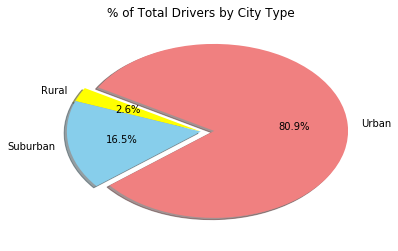

<Figure size 432x288 with 0 Axes>

In [292]:
# Calculate Driver Percents
total_drivers= typesgroup_df['driver_count'].sum()
typesgroup_df['Drivers Percentage']=typesgroup_df['driver_count']/total_drivers*100
typesgroup_df

# Build Pie Charts
labels = typesgroup_df['type']
sizes = typesgroup_df['Drivers Percentage']
colors = ["yellow", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/percent_drivers.png")

plt.show()
plt.draw()
